In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv
Saving test.csv to test.csv
Saving gender_submission.csv to gender_submission.csv


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
gender_submission = pd.read_csv('/content/gender_submission.csv')

# Display the first few rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check for missing values
print(train_df.isnull().sum())

# Check basic information
print(train_df.info())

# Check dataset summary
print(train_df.describe())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

In [6]:
# Fill missing 'Age' with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with most common value ('S')
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S', inplace=True)

# Fill missing 'Fare' in test set with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Drop 'Cabin' column since it has too many missing values
train_df.drop(columns=['Cabin'], inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)

# Convert categorical variables to numerical values
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

<ipython-input-6-24e08a4e4ced>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-6-24e08a4e4ced>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

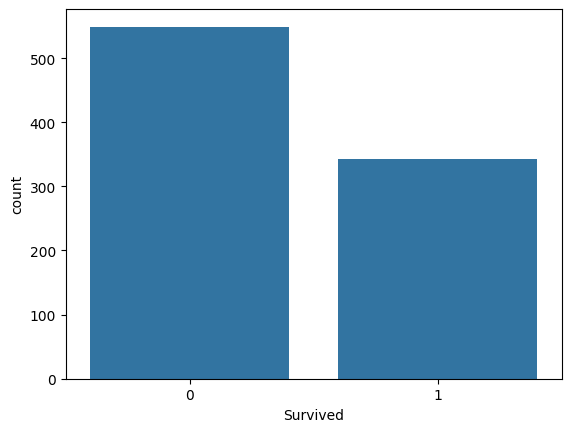

In [22]:
# Survival count
sns.countplot(x='Survived', data=train_df)
plt.show()

<ipython-input-15-0f5aebd77cfd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_df, ci=None, palette='coolwarm')
<ipython-input-15-0f5aebd77cfd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=train_df, ci=None, palette='coolwarm')


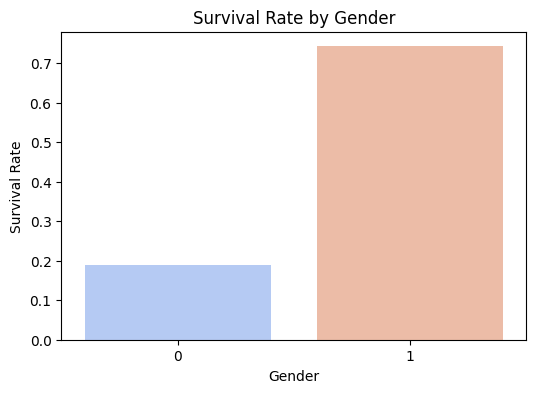

In [15]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=train_df, ci=None, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-13-2de47817953d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_df, ci=None, palette='pastel')
<ipython-input-13-2de47817953d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train_df, ci=None, palette='pastel')


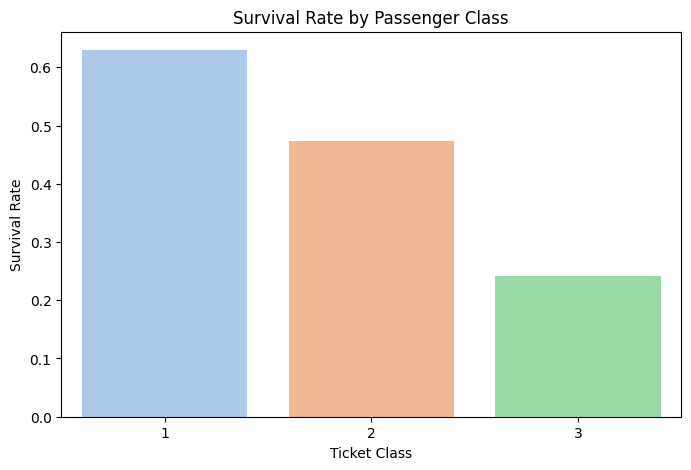

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=train_df, ci=None, palette='pastel')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')
plt.show()

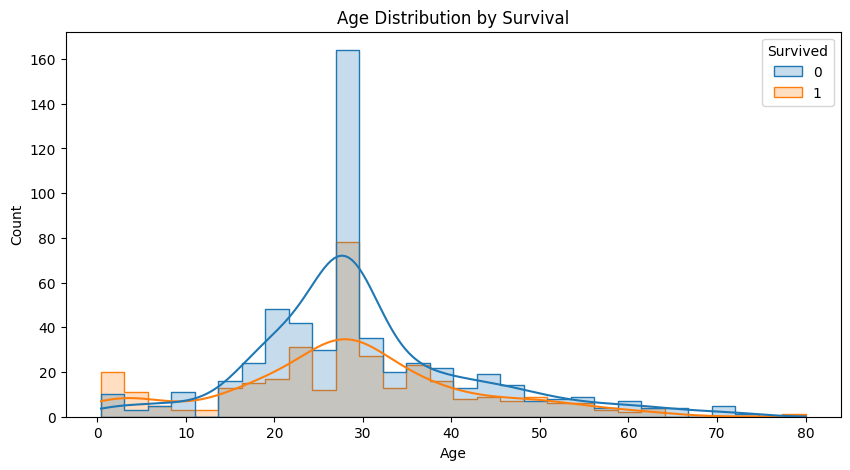

In [17]:
# Survival by age
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df, x='Age', bins=30, kde=True, hue='Survived', element='step')
plt.title('Age Distribution by Survival')
plt.show()

<ipython-input-18-95485c235c83>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=train_df, ci=None, palette='muted')
<ipython-input-18-95485c235c83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=train_df, ci=None, palette='muted')


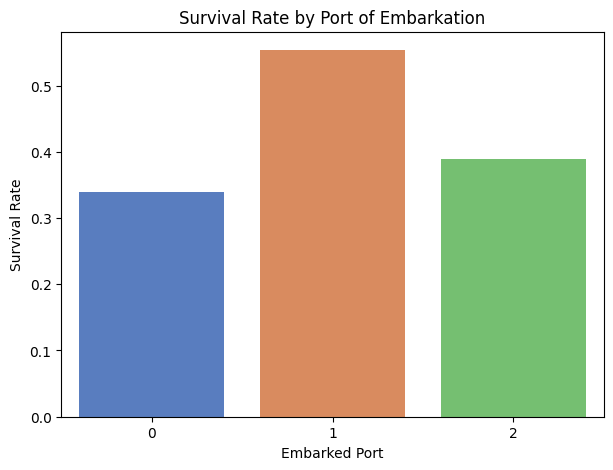

In [18]:
plt.figure(figsize=(7, 5))
sns.barplot(x='Embarked', y='Survived', data=train_df, ci=None, palette='muted')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

<ipython-input-19-d0b500aa4f63>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=train_df, ci=None, palette='Blues')
<ipython-input-19-d0b500aa4f63>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=train_df, ci=None, palette='Blues')


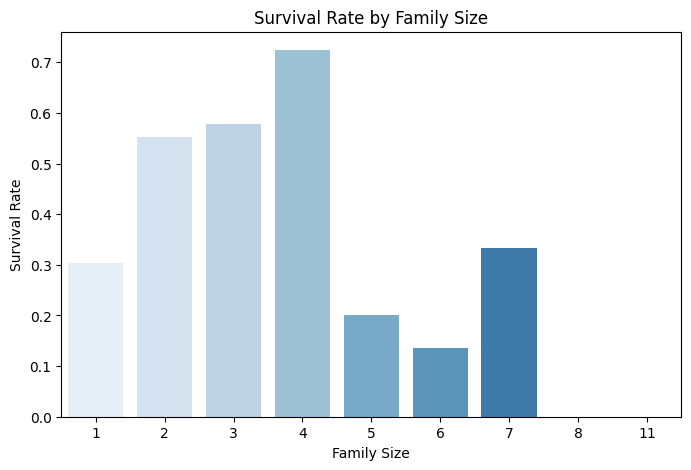

In [19]:
# Create a new feature for family size
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', data=train_df, ci=None, palette='Blues')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

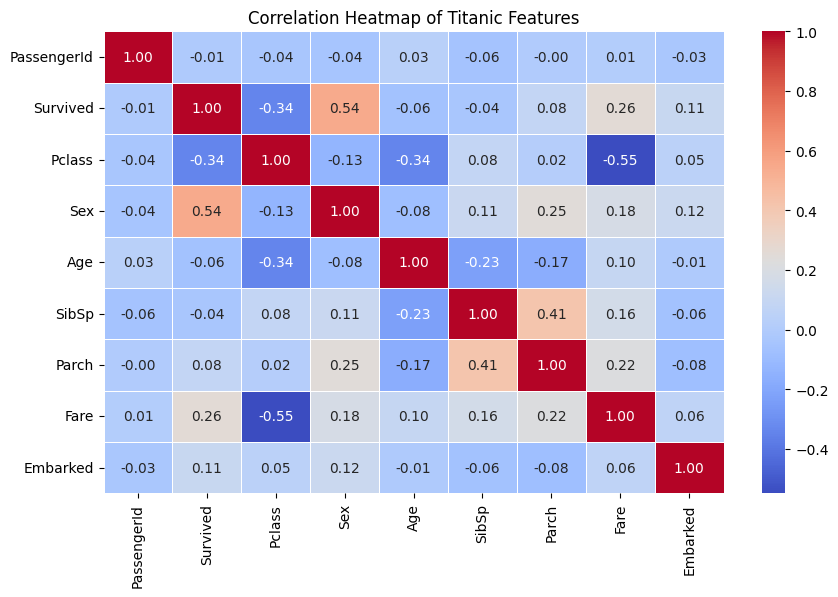

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_train_df = train_df.select_dtypes(include=['number'])  # Keeps only numeric columns

# Generate the Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Titanic Features')
plt.show()